In [1]:
#Importing common libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Loading iris dataset from sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
print("iris dataset description: \n{}\n. . .".format(iris_dataset['DESCR'][:200]))

iris dataset description: 
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes
. . .


In [4]:
print("Target Names:\n{}".format(iris_dataset['target_names']))

Target Names:
['setosa' 'versicolor' 'virginica']


In [5]:
print("Feature Names:\n{}".format(iris_dataset['feature_names']))

Feature Names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))

Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)


In [7]:
print("First few rows of data:\n {}".format(iris_dataset['data'][:5]))

First few rows of data:
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [8]:
print("Type of target: {}".format(type(iris_dataset['target'])))
print("Shape of target: {}".format(iris_dataset['target'].shape))

Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)


In [9]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
#Importing function to split the iris_dataset for training and testing
from sklearn.model_selection import train_test_split
#Split the data in training and testing set
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                    iris_dataset['target'],
                                                    random_state = 0)

The **train_test_split** function shuffles the data using a pseudorandom number generator. Shuffling is important as data may be sorted and we may not pick all the relevant data for training. The **random_state** is used to seed that pseudorandom number generator, so that we get same output  

In [11]:
#Priniting shape of train and test sets
print("Shape of X_train :{} and y_train :{}".format(X_train.shape, y_train.shape))
print("Shape of X_test :{} and y_test :{}".format(X_test.shape, y_test.shape))

Shape of X_train :(112, 4) and y_train :(112,)
Shape of X_test :(38, 4) and y_test :(38,)


In [12]:
#Create a pandas dataframe from iris train set
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])

In [13]:
#Viewing iris dataframe
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


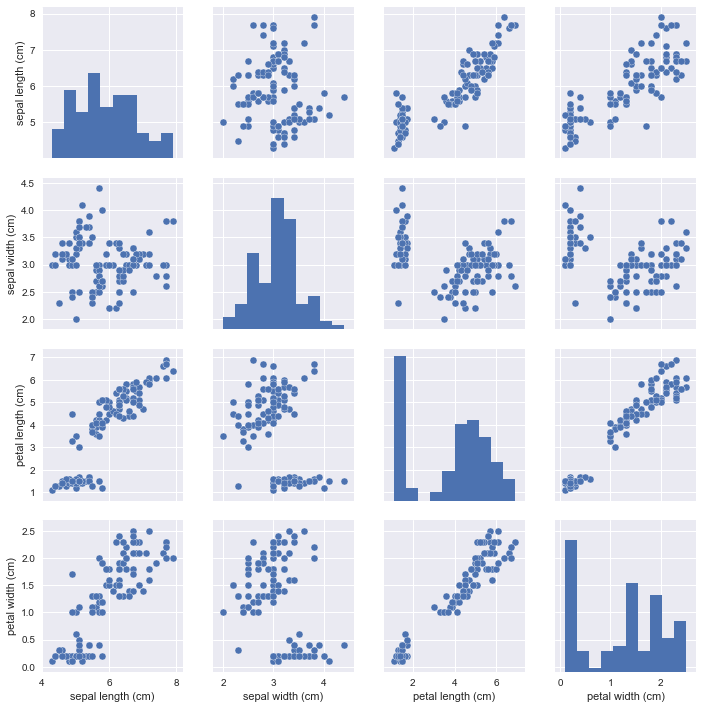

In [14]:
pg = sns.pairplot(iris_dataframe)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.97368421052631582

In [17]:
#Lets find the best value for n
neighbor_set = range(1,11)
training_score = []
test_score = []

for n in neighbor_set:
    #Build model
    knn = KNeighborsClassifier(n_neighbors=n)
    
    #Train the model
    knn.fit(X_train, y_train)
    
    #Capture the scores for selected n
    training_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

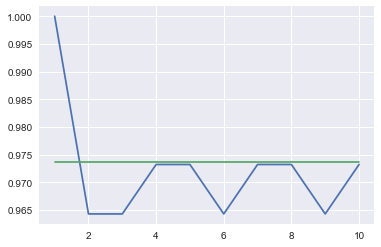

In [21]:
#Plotting the results
fg = plt.figure()
ax = plt.axes()
ax.plot(neighbor_set, training_score)
ax.plot(neighbor_set, test_score)

It seems there is no change in test accuracy with change in number of neighbors